<div align="center"><font size="6"><b> DS8002: Machine Learning </b></font></div>

---

<span style="color:red"><font size="3"><b> ONLY .ipynb FILE IS ACCEPTED. You should use only this file without removing the cells. </b></font></span>


<font size="4"><b> Lab Exam-2 </b></font>

<font size="3">Nov. 16th, 2021. 6:00 p.m. - 7:50 p.m.</font>

You should be present in the Zoom during the exam.

**Do not forget to rename it as explained in the instruction file. Failing to do that, will result in losing 3 points.**

**THE CODE SHOULD BE RUN AND THE OUTPUTS SHOULD BE PRINTED TO GET THE FULL MARK.**

In [103]:
import numpy  as np 
import random
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as la

## Q1. (40 points) K-means Clustering
Consider the following variant of $k$-means clustering algorithm:\
Input: $x^1,.....,x^n,\ k$\
Step 1: Select $k$ cluster centers $c_1,....,c_k$ randomly\
Step 2: for each point $x$, determine its cluster: find the closest
center using Chebyshev distance\
Step 3: update all cluster centers as the centroids:
$c_i = \frac{\sum_{\{x \in \ cluster \ i\}} x}{ SizeOf(cluster \ i)}$\
Repeat step 2, 3 until cluster centers no longer change\
where Chebyshev distance between point $p (p_1,p_2...p_n)$ and
$q (q_1,q_2,.... q_n)$ can be defined as follows :
$d\left( p,q\right) =  \max _{i} ( \left| \begin{matrix} p_{i} -q_{i}\end{matrix} \right|   )$

In [104]:
np.random.seed(1)
X3d = np.round(np.random.random([30,3]),3)
#print(X3d)
X3d

array([[0.417, 0.72 , 0.   ],
       [0.302, 0.147, 0.092],
       [0.186, 0.346, 0.397],
       [0.539, 0.419, 0.685],
       [0.204, 0.878, 0.027],
       [0.67 , 0.417, 0.559],
       [0.14 , 0.198, 0.801],
       [0.968, 0.313, 0.692],
       [0.876, 0.895, 0.085],
       [0.039, 0.17 , 0.878],
       [0.098, 0.421, 0.958],
       [0.533, 0.692, 0.316],
       [0.687, 0.835, 0.018],
       [0.75 , 0.989, 0.748],
       [0.28 , 0.789, 0.103],
       [0.448, 0.909, 0.294],
       [0.288, 0.13 , 0.019],
       [0.679, 0.212, 0.266],
       [0.492, 0.053, 0.574],
       [0.147, 0.589, 0.7  ],
       [0.102, 0.414, 0.694],
       [0.414, 0.05 , 0.536],
       [0.664, 0.515, 0.945],
       [0.587, 0.903, 0.137],
       [0.139, 0.807, 0.398],
       [0.165, 0.928, 0.348],
       [0.751, 0.726, 0.883],
       [0.624, 0.751, 0.349],
       [0.27 , 0.896, 0.428],
       [0.965, 0.663, 0.622]])

#### Define the initial cluster centers :

In [105]:
##randomly choosing 3 indexes
np.random.randint(0,29,3)

array([12, 28,  7])

In [106]:
cc = [X3d[7],X3d[28],X3d[19]]
cc

[array([0.968, 0.313, 0.692]),
 array([0.27 , 0.896, 0.428]),
 array([0.147, 0.589, 0.7  ])]

In [107]:
def chebyshev_distance(cc, p):
    distance = []
    for a,b in zip(cc, p):
        distance.append(abs(a-b))
    return max(distance)

In [108]:
def predict_cluster_center_chebyshev(centre_point, points):
    min_distance = 10000000
    center_i = 0
    for i, c in enumerate(centre_point):
        temp_distance = chebyshev_distance(c, points)
        if temp_distance < min_distance:
            min_distance = temp_distance
            center_i = i
    return center_i

Report the 3 cluster center values after 10 iterations

In [112]:
import math
n_iter = 10

print('the original cluster centres:', cc)
for n in range(n_iter):
    print('Iteration #', n)
    y_predict = {}
    clusters = {k: [] for k in range(len(cc))} #{0: [], 1: [], 2: []}

    for i, x in enumerate(X3d):
        y_predict[i] = predict_cluster_center_chebyshev(cc, x)
        clusters[y_predict[i]].append(list(x))
        
    new_centers = [None]*len(cc)
    for i in range(len(new_centers)):
        new_centers[i] = list(np.mean(clusters[i], axis=0))

    print('New cluster centre:', new_centers)
    diff = sum(sum(abs(np.array(cc) - np.array(new_centers))))
    if diff > 0:
        cc = new_centers
    else:
        print("CONVERGED!")
        #break

print('PART 1 - printing below new centres after every iteration!!!')
print('PART 2 - The cluster centre after 10 iterations', new_centers)

the original cluster centres: [[0.6473333333333333, 0.39355555555555555, 0.5292222222222223], [0.46, 0.8455384615384616, 0.25007692307692303], [0.20224999999999999, 0.28012499999999996, 0.69225]]
Iteration # 0
New cluster centre: [[0.6473333333333333, 0.39355555555555555, 0.5292222222222223], [0.46, 0.8455384615384616, 0.25007692307692303], [0.20224999999999999, 0.28012499999999996, 0.69225]]
CONVERGED!
Iteration # 1
New cluster centre: [[0.6473333333333333, 0.39355555555555555, 0.5292222222222223], [0.46, 0.8455384615384616, 0.25007692307692303], [0.20224999999999999, 0.28012499999999996, 0.69225]]
CONVERGED!
Iteration # 2
New cluster centre: [[0.6473333333333333, 0.39355555555555555, 0.5292222222222223], [0.46, 0.8455384615384616, 0.25007692307692303], [0.20224999999999999, 0.28012499999999996, 0.69225]]
CONVERGED!
Iteration # 3
New cluster centre: [[0.6473333333333333, 0.39355555555555555, 0.5292222222222223], [0.46, 0.8455384615384616, 0.25007692307692303], [0.20224999999999999, 0.

Plot the data points and cluster centers

PART 4 - yes, K mean clustering is sensitive to outliers, ideally we need to remove them before, because K means is sensitive to outliers, or we should use more robust agorithm for clustering, for example k medians
PART 5 - Random initialization the practice of using random numbers to initialize the weights of a machine learning model. Yes, k means algorithm, 
which follows k-centroid initialization, is highly sensitive to the initial placement of centroids. Poor random initialization can cause the algorithm to get stuck 
into an inferior local minimum. This sensitivity is the disadvantage of k means algorithm.






PART 3 - Plotting the data points with new centres and color is the cluster label - 3 clusters as per task!!!, black instances - new centeres


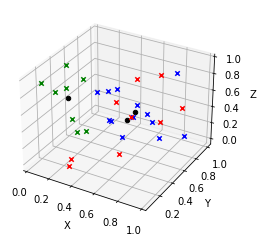

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection ='3d')

#plotting the dots
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

for i, v in y_predict.items():
    if v == 0:
        ax.scatter(X3d[i][0], X3d[i][1], X3d[i][2], marker = 'x', color = 'red')
    if v == 1:
        ax.scatter(X3d[i][0], X3d[i][1], X3d[i][2], marker = 'x', color = 'blue')
    if v == 2:
        ax.scatter(X3d[i][0], X3d[i][1], X3d[i][2], marker = 'x', color = 'green')

ax.scatter(new_centers[0][0], new_centers[0][1], new_centers[0][2], marker = 'o', color = 'black')
ax.scatter(new_centers[1][0], new_centers[1][1], new_centers[1][2], marker = 'o', color = 'black')
ax.scatter(new_centers[2][0], new_centers[2][1], new_centers[2][2], marker = 'o', color = 'black')

print('PART 4 - yes, K mean clustering is sensitive to outliers, ideally we need to remove them before, because K means is sensitive to outliers, or we should use more robust agorithm for clustering, for example k medians')
print('PART 5 - Random initialization the practice of using random numbers to initialize the weights of a machine learning model. Yes, k means algorithm, ')
print('which follows k-centroid initialization, is highly sensitive to the initial placement of centroids. Poor random initialization can cause the algorithm to get stuck ')
print('into an inferior local minimum. This sensitivity is the disadvantage of k means algorithm.')
print('\n')
print('\n')
print('\n')


print('PART 3 - Plotting the data points with new centres and color is the cluster label - 3 clusters as per task!!!, black instances - new centeres')

## Q2. (35 points) Parametric Classification


In [114]:
expo_dict = {0.1077:0,  0.2727:0  ,  0.4899:0 ,  0.386:0 , 
             0.0387:0,  0.0001:0 ,  0.4755:0 ,  0.1968:0 , 
              0.2202:0 ,  0.0629:0 ,  0.0719:0 ,  0.0466:0 , 
              0.5517:0 ,  0.2386:0 ,  0.0935:0 ,  0.0112:0 ,
              0.1646:0 ,  0.124:0 ,  0.0586:0 ,  0.151:0 , 
              0.1238:0 ,  0.8702:0 ,  0.2902:0 ,  0.0186:0 ,
              0.2464:0 ,  0.2152:1 ,  0.6798:1 ,  0.9737:1 , 
              0.4371:1 ,  0.1774:1 ,  0.3256:1 ,  0.1446:1 , 
              0.259:1 ,  0.3758:1 ,  0.0705:1 ,  0.2922:1 , 
              0.7107:1 ,  0.9259:1 ,  0.1786:1 ,  0.8671:1 , 
              0.7042:1 ,  0.3865:1 ,  0.2623:1 ,  0.3469:1 , 
              1.0398:1 ,  0.0368:1 ,  0.1405:1 ,  0.0416:1 , 
              0.3891:1 ,  0.3493:1 }  

In [118]:
X  = [val for val in expo_dict.keys()]
r1 = [1 if expo_dict[val] == 0 else 0 for val in expo_dict.keys()]
r2 = [1 if expo_dict[val] == 1 else 0 for val in expo_dict.keys()]
x_1 = [val for val in expo_dict.keys() if expo_dict[val] == 0]
x_2 = [val for val in expo_dict.keys() if expo_dict[val] == 1]

r1 = [0]*len(x_1)
r2 = [1]*len(x_2)

In [26]:
#print(expo_dict.items())

dict_items([(0.1077, 0), (0.2727, 0), (0.4899, 0), (0.386, 0), (0.0387, 0), (0.0001, 0), (0.4755, 0), (0.1968, 0), (0.2202, 0), (0.0629, 0), (0.0719, 0), (0.0466, 0), (0.5517, 0), (0.2386, 0), (0.0935, 0), (0.0112, 0), (0.1646, 0), (0.124, 0), (0.0586, 0), (0.151, 0), (0.1238, 0), (0.8702, 0), (0.2902, 0), (0.0186, 0), (0.2464, 0), (0.2152, 1), (0.6798, 1), (0.9737, 1), (0.4371, 1), (0.1774, 1), (0.3256, 1), (0.1446, 1), (0.259, 1), (0.3758, 1), (0.0705, 1), (0.2922, 1), (0.7107, 1), (0.9259, 1), (0.1786, 1), (0.8671, 1), (0.7042, 1), (0.3865, 1), (0.2623, 1), (0.3469, 1), (1.0398, 1), (0.0368, 1), (0.1405, 1), (0.0416, 1), (0.3891, 1), (0.3493, 1)])


In [119]:
def calc_mean(values): 
    return sum(values) / len(values)

In [120]:
def lambda_e(mean):
    return 1 / mean

In [121]:
def calc_prior(class_items):
    return len(class_items) / len(X)

In [123]:
def calc_prior(class_items):
    return len(class_items) / len(X)

In [124]:
def discriminant(value, prior, mean):
    return np.log(lambda_e(mean)) - lambda_e(mean)*value + np.log(prior)

In [125]:
mean_x1 = calc_mean(x_1)
mean_x2 = calc_mean(x_2)
prior_x1 = calc_prior(x_1)
prior_x2 = calc_prior(x_2)

print('mean x1', mean_x1) 
print('mean x2', mean_x2)
print('priors', prior_x1, prior_x2)

mean x1 0.21245600000000003
mean x2 0.4132079999999999
priors 0.5 0.5


In [126]:
c_classification = 0

for key, value in expo_dict.items():
    discriminant_1 = discriminant(key, prior_x1, mean_x1)
    discriminant_2 = discriminant(key, prior_x2, mean_x2)

    if discriminant_1 > discriminant_2 and value == 0:
        c_classification += 1
    elif discriminant_1 < discriminant_2 and value == 1:
        c_classification +=1

print(c_classification)

35


#### Number of correctly classified instances

In [127]:
print('number of correctly classified instance ' + str(c_classification) + ' out of ' + str(len(expo_dict)))

number of correctly classified instance 35 out of 50
